In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
total = pd.read_csv('us.csv', header=0, sep=',')
total.head(10)

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
5,2020-01-26,5,0
6,2020-01-27,5,0
7,2020-01-28,5,0
8,2020-01-29,5,0
9,2020-01-30,6,0


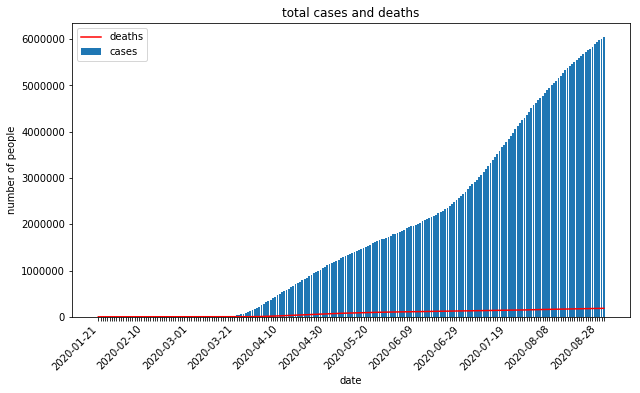

In [9]:
total = total.iloc[:224, :]

fig = plt.figure(figsize = (10,6))
plt.bar(total.date, 
         total.cases,  
         label = 'cases'
        )
plt.plot(total.date, 
        total.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::20]:
    label.set_visible(True)
    
plt.title('total cases and deaths')
plt.xlabel('date')
plt.ylabel('number of people')

fig.autofmt_xdate(rotation = 45)

plt.legend()
plt.show()

In [24]:
new_increase = pd.DataFrame()

new_increase['date'] = total['date']

new_increase_cases = total['cases'].copy()
new_increase_cases.values[1:] -= new_increase_cases.values[:-1]
new_increase['cases'] = new_increase_cases

new_increase_deaths = total['deaths'].copy()
new_increase_deaths.values[1:] -= new_increase_deaths.values[:-1]
new_increase['deaths'] = new_increase_deaths

new_increase.head(10)

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,0,0
2,2020-01-23,0,0
3,2020-01-24,1,0
4,2020-01-25,1,0
5,2020-01-26,2,0
6,2020-01-27,0,0
7,2020-01-28,0,0
8,2020-01-29,0,0
9,2020-01-30,1,0


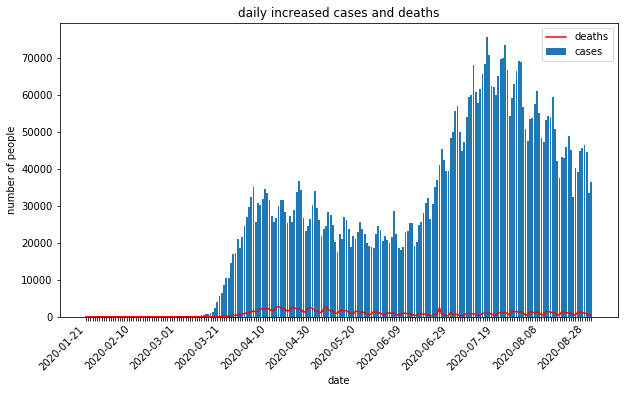

In [26]:
fig = plt.figure(figsize = (10,6))
plt.bar(new_increase.date, 
         new_increase.cases,  
         label = 'cases'
        )
plt.plot(new_increase.date, 
        new_increase.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::20]:
    label.set_visible(True)
    
plt.title('daily increased cases and deaths')
plt.xlabel('date')
plt.ylabel('number of people')

fig.autofmt_xdate(rotation = 45)

plt.legend()
plt.show()

In [27]:
# 7-Day Moving Average
average7 = pd.DataFrame()

average7['date'] = new_increase['date']

N = 7
n = np.ones(N)
weights = n/N

new_increase_cases = new_increase['cases'].values
average7_cases = pd.Series(np.convolve(weights, new_increase_cases)[:new_increase_cases.shape[0]])
average7['cases'] = average7_cases

new_increase_deaths = new_increase['deaths'].values
average7_deaths = pd.Series(np.convolve(weights, new_increase_deaths)[:new_increase_deaths.shape[0]])
average7['deaths'] = average7_deaths

average7.head(10)

,date,cases,deaths
0,2020-01-21,0.142857,0.0
1,2020-01-22,0.142857,0.0
2,2020-01-23,0.142857,0.0
3,2020-01-24,0.285714,0.0
4,2020-01-25,0.428571,0.0
5,2020-01-26,0.714286,0.0
6,2020-01-27,0.714286,0.0
7,2020-01-28,0.571429,0.0
8,2020-01-29,0.571429,0.0
9,2020-01-30,0.714286,0.0


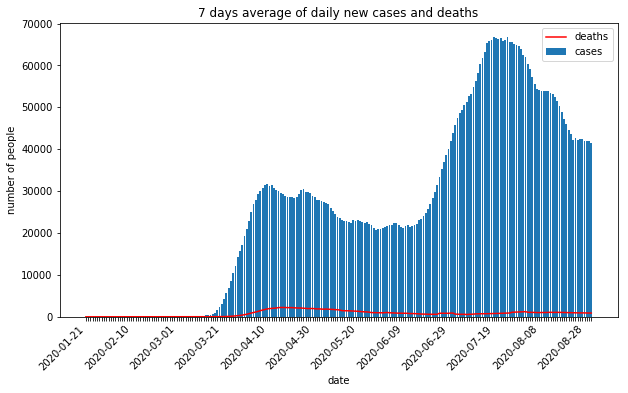

In [28]:
fig = plt.figure(figsize = (10,6))
plt.bar(average7.date, 
         average7.cases,  
         label = 'cases'
        )
plt.plot(average7.date, 
        average7.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::20]:
    label.set_visible(True)
    
plt.title('7 days average of daily new cases and deaths')
plt.xlabel('date')
plt.ylabel('number of people')

fig.autofmt_xdate(rotation = 45)

plt.legend()
plt.show()

In [30]:
# weekly average
average_week = pd.DataFrame()

average_week_date = np.empty([33], dtype='S10')
average_week_date[1:] = new_increase['date'].values[5::7]
average_week_date[0] = new_increase['date'].values[0]
average_week['start_date'] = pd.Series(average_week_date)

new_increase_cases = new_increase['cases'].values
average_week_cases = np.zeros(33)
average_week_cases[0] = np.mean(new_increase_cases[:5])
for i in range(31):
    average_week_cases[i+1] = np.mean(new_increase_cases[i*7+5:i*7+12]) 
average_week_cases[32] = np.mean(new_increase_cases[31*7+5:31*7+7])
average_week['cases'] = pd.Series(average_week_cases)
    
new_increase_deaths = new_increase['deaths'].values
average_week_deaths = np.zeros(33)
average_week_deaths[0] = np.mean(new_increase_deaths[:5])
for i in range(31):
    average_week_deaths[i+1] = np.mean(new_increase_deaths[i*7+5:i*7+12])
average_week_deaths[32] = np.mean(new_increase_deaths[31*7+5:31*7+7]) 
average_week['deaths'] = pd.Series(average_week_deaths)

average_week.head(10)

,start_date,cases,deaths
0,b'2020-01-21',0.600000,0.000000
1,b'2020-01-26',0.714286,0.000000
2,b'2020-02-02',0.571429,0.000000
3,b'2020-02-09',0.428571,0.000000
4,b'2020-02-16',2.142857,0.000000
5,b'2020-02-23',5.714286,0.142857
6,b'2020-03-01',51.142857,2.571429
7,b'2020-03-08',352.857143,5.857143
8,b'2020-03-15',3090.000000,42.857143
9,b'2020-03-22',14205.428571,277.142857


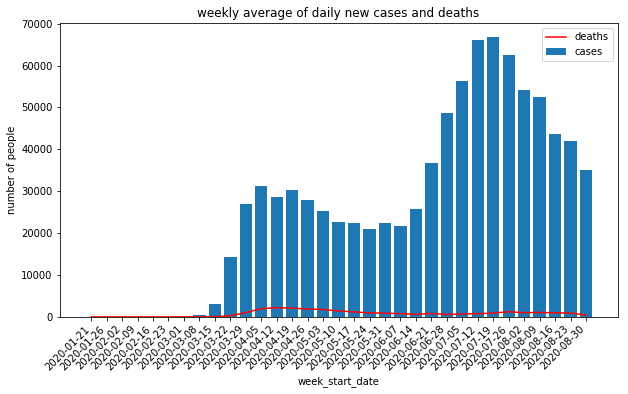

In [31]:
fig = plt.figure(figsize = (10,6))
plt.bar(average_week.start_date, 
         average_week.cases,  
         label = 'cases'
        )
plt.plot(average_week.start_date, 
        average_week.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::1]:
    label.set_visible(True)
    
plt.title('weekly average of daily new cases and deaths')
plt.xlabel('week_start_date')
plt.ylabel('number of people')

fig.autofmt_xdate(rotation = 45)

plt.legend()
plt.show()

In [32]:
# monthly average
average_month = pd.DataFrame()

average_month_name = np.empty([8], dtype='S10')
average_month_name[0] = 'Jan.'
average_month_name[1] = 'Feb.'
average_month_name[2] = 'Mar.'
average_month_name[3] = 'Apr.'
average_month_name[4] = 'May'
average_month_name[5] = 'June'
average_month_name[6] = 'July'
average_month_name[7] = 'Aug.'
average_month['month'] = pd.Series(average_month_name)


new_increase_cases = new_increase['cases'].values
average_month_cases = np.zeros(8)
average_month_cases[0] = np.mean(new_increase_cases[:11])
average_month_cases[1] = np.mean(new_increase_cases[11:40])
average_month_cases[2] = np.mean(new_increase_cases[40:71])
average_month_cases[3] = np.mean(new_increase_cases[71:101])
average_month_cases[4] = np.mean(new_increase_cases[101:132])
average_month_cases[5] = np.mean(new_increase_cases[132:162])
average_month_cases[6] = np.mean(new_increase_cases[162:193])
average_month_cases[7] = np.mean(new_increase_cases[193:224])
average_month['cases'] = pd.Series(average_month_cases)

new_increase_deaths = new_increase['deaths'].values
average_month_deaths = np.zeros(8)
average_month_deaths[0] = np.sum(new_increase_deaths[:11]) / 31
average_month_deaths[1] = np.mean(new_increase_deaths[11:40])
average_month_deaths[2] = np.mean(new_increase_deaths[40:71])
average_month_deaths[3] = np.mean(new_increase_deaths[71:101])
average_month_deaths[4] = np.mean(new_increase_deaths[101:132])
average_month_deaths[5] = np.mean(new_increase_deaths[132:162])
average_month_deaths[6] = np.mean(new_increase_deaths[162:193])
average_month_deaths[7] = np.mean(new_increase_deaths[193:224])
average_month['deaths'] = pd.Series(average_month_deaths)

average_month.head(10)

,month,cases,deaths
0,b'Jan.',0.636364,0.000000
1,b'Feb.',2.172414,0.034483
2,b'Mar.',6077.129032,138.806452
3,b'Apr.',29576.500000,1961.200000
4,b'May',23339.193548,1330.258065
5,b'June',28465.733333,769.433333
6,b'July',61878.677419,851.580645
7,b'Aug.',47526.870968,955.258065


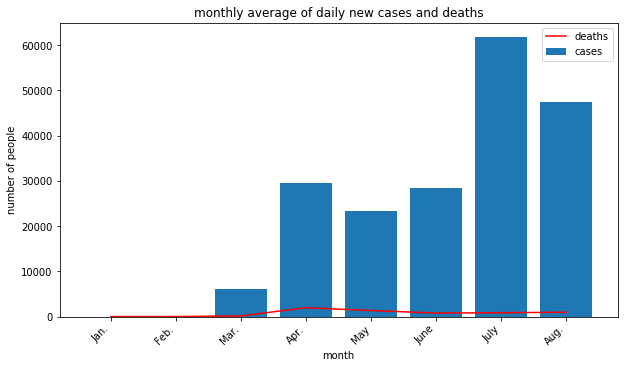

In [33]:
fig = plt.figure(figsize = (10,6))
plt.bar(average_month.month, 
         average_month.cases,  
         label = 'cases'
        )
plt.plot(average_month.month, 
        average_month.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::1]:
    label.set_visible(True)
    
plt.title('monthly average of daily new cases and deaths')
plt.xlabel('month')
plt.ylabel('number of people')

fig.autofmt_xdate(rotation = 45)

plt.legend()
plt.show()

In [34]:
new_increase.sort_values(by='cases', ascending=False).head(10)[['date', 'cases']]

,date,cases
177,2020-07-16,75682
185,2020-07-24,73524
178,2020-07-17,70922
184,2020-07-23,70004
183,2020-07-22,69737
191,2020-07-30,69111
192,2020-07-31,69059
176,2020-07-15,68336
171,2020-07-10,68224
186,2020-07-25,66776


In [35]:
new_increase.sort_values(by='cases', ascending=True).head(10)[['date', 'cases']]

,date,cases
33,2020-02-23,0
19,2020-02-09,0
18,2020-02-08,0
17,2020-02-07,0
16,2020-02-06,0
14,2020-02-04,0
13,2020-02-03,0
24,2020-02-14,0
25,2020-02-15,0
26,2020-02-16,0


In [36]:
new_increase.sort_values(by='deaths', ascending=False).head(10)[['date', 'deaths']]

,date,deaths
85,2020-04-15,2752
106,2020-05-06,2708
84,2020-04-14,2705
91,2020-04-21,2672
99,2020-04-29,2514
156,2020-06-25,2466
98,2020-04-28,2394
92,2020-04-22,2371
86,2020-04-16,2349
87,2020-04-17,2289


In [37]:
new_increase.sort_values(by='deaths', ascending=True).head(10)[['date', 'deaths']]

,date,deaths
0,2020-01-21,0
22,2020-02-12,0
24,2020-02-14,0
25,2020-02-15,0
26,2020-02-16,0
27,2020-02-17,0
28,2020-02-18,0
29,2020-02-19,0
30,2020-02-20,0
31,2020-02-21,0


In [38]:
most_cases_week = average_week.sort_values(by='cases', ascending=False).head(5)[['start_date', 'cases']]
most_cases_week['cases'] = (most_cases_week['cases'].values * 7).astype(int)
most_cases_week

,start_date,cases
26,b'2020-07-19',467469
25,b'2020-07-12',462357
27,b'2020-07-26',438114
24,b'2020-07-05',394429
28,b'2020-08-02',379619


In [39]:
most_deaths_week = average_week.sort_values(by='deaths', ascending=False).head(5)[['start_date', 'deaths']]
most_deaths_week['deaths'] = (most_deaths_week['deaths'].values * 7).astype(int)
most_deaths_week

,start_date,deaths
12,b'2020-04-12',15491
13,b'2020-04-19',14668
11,b'2020-04-05',13680
14,b'2020-04-26',13158
15,b'2020-05-03',12349


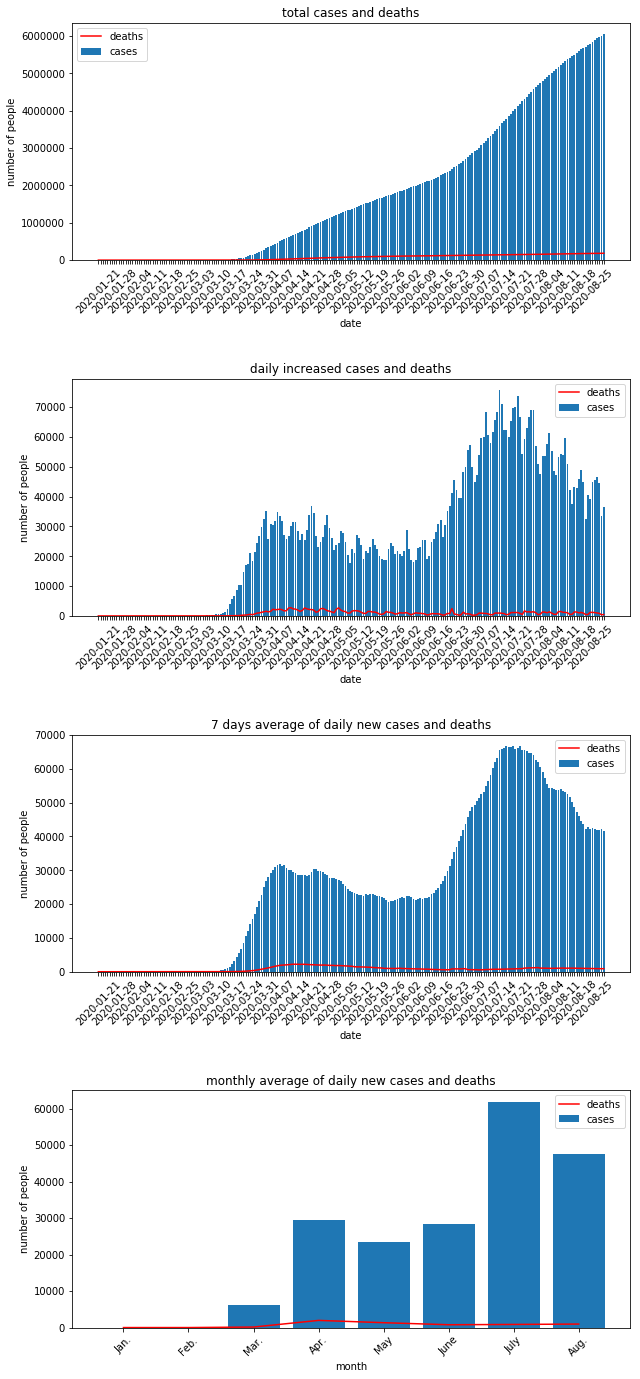

In [43]:
fig, axs = plt.subplots(4, 1, constrained_layout=False, figsize = (10,24))
plt.subplots_adjust(hspace = .5)

axs[0].bar(total.date, 
         total.cases,  
         label = 'cases'
        )
axs[0].plot(total.date, 
        total.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )
for label in axs[0].get_xticklabels():
    label.set_visible(False)
for label in axs[0].get_xticklabels()[::7]:
    label.set_visible(True)
    label.set_rotation(45)
    
axs[0].set_title('total cases and deaths')
axs[0].set_xlabel('date')
axs[0].set_ylabel('number of people')

axs[0].legend()

axs[1].bar(new_increase.date, 
         new_increase.cases,  
         label = 'cases'
        )
axs[1].plot(new_increase.date, 
        new_increase.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

for label in axs[1].get_xticklabels():
    label.set_visible(False)
for label in axs[1].get_xticklabels()[::7]:
    label.set_visible(True)
    label.set_rotation(45)
    
axs[1].set_title('daily increased cases and deaths')
axs[1].set_xlabel('date')
axs[1].set_ylabel('number of people')

axs[1].legend()

axs[2].bar(average7.date, 
         average7.cases,  
         label = 'cases'
        )
axs[2].plot(average7.date, 
        average7.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

for label in axs[2].get_xticklabels():
    label.set_visible(False)
for label in axs[2].get_xticklabels()[::7]:
    label.set_visible(True)
    label.set_rotation(45)

axs[2].set_title('7 days average of daily new cases and deaths')
axs[2].set_xlabel('date')
axs[2].set_ylabel('number of people')

axs[2].legend()

axs[3].bar(average_month.month, 
         average_month.cases,  
         label = 'cases'
        )
axs[3].plot(average_month.month, 
        average_month.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

for label in axs[3].get_xticklabels():
    label.set_rotation(45)

axs[3].set_title('monthly average of daily new cases and deaths')
axs[3].set_xlabel('month')
axs[3].set_ylabel('number of people')

axs[3].legend()

plt.show()